<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

## Question 1 uses k-means as an unsupervised way to classify different regions in an uploaded image

First, we import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.cluster import KMeans

from google.colab import files

Now, we import and load our data

Saving seg2.jpg to seg2 (2).jpg


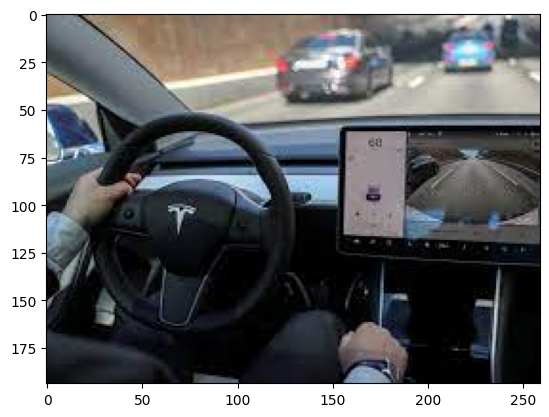

In [ ]:
uploaded = files.upload()

image = imread("seg2.jpg")

plt.imshow(image)
plt.show()

Now, we start the training, and plot our results

Image Shape = (194, 259, 3)
Image Vector Shape = (50246, 3)


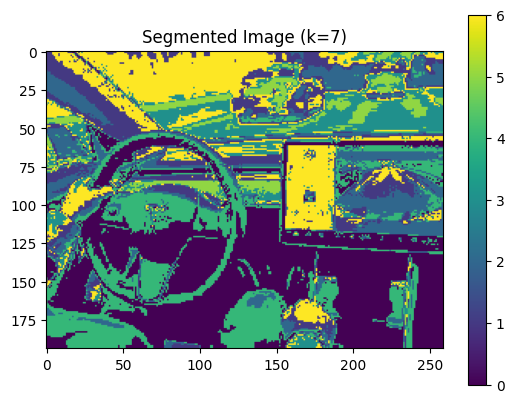

In [ ]:
print(f"Image Shape = {image.shape}")
image_vector = image.reshape(-1, 3)
print(f"Image Vector Shape = {image_vector.shape}")

k = 7  # Number of clusters
kmeans = KMeans(n_clusters=k,  init='k-means++', n_init='auto')

kmeans.fit(image_vector)

labels = kmeans.labels_
segmented_image = labels.reshape(image.shape[:2])  # Reshape back to original image dimensions

plt.imshow(segmented_image, cmap='viridis')  # Use a suitable colormap
plt.title(f"Segmented Image (k={k})")
plt.colorbar()
plt.show()


Plotting our results, we get: a color map that outlines the steering wheel, the screen, a bit of the car frame, and almost captures the outline of the other cars.

## Question 2 uses mini batch gradient descent to calculate housing prices as a function of city population

First, we will load out data using the given dataloader code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


Text(0, 0.5, 'Price in $10,000s')

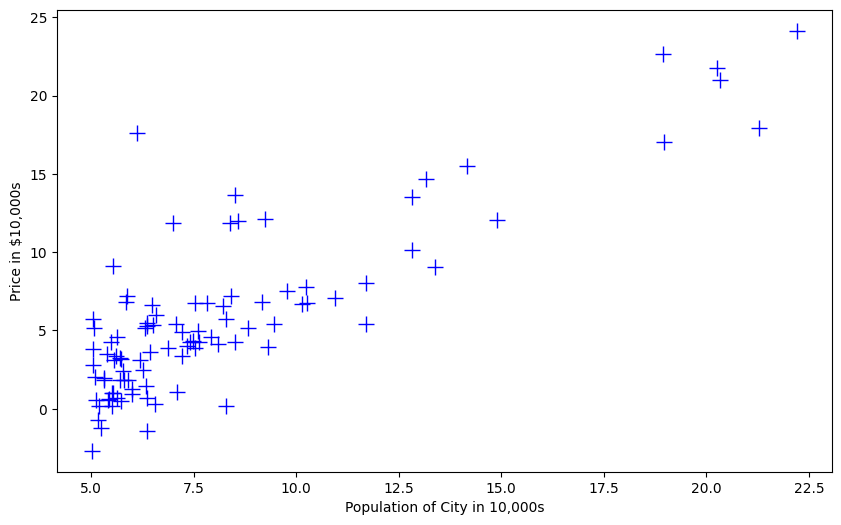

In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive using drive._mount() to potentially bypass the issue
# This method might provide a more direct way to handle authentication
drive.mount('/content/drive')

# Go to the current folder
%cd /content/drive/MyDrive/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

Now, we will define out cost function, and batch sizes, and initialize our weights.

In [ ]:
m = [1,5,10,20] #batch size

w_vec = [0,0] #bias and w1 respectively

def J(x,y,w_vec,m):
  cost = 1/(2*m) * np.sum(np.square(y - (x.dot(w_vec))))
  return cost

Now, we will train our models

In [ ]:
epochs = 1000 #Number of times we update the weights
batch_size = m[0]
step = 1e-4 #training step

J_vec = np.zeros([epochs,1]) #Update J for each epoch
w_array = np.zeros([epochs,len(w_vec)])

m_indices = np.random.choice(X.shape[0], batch_size, replace=False)  # Choose m random indicies in X

X_m = X[m_indices]
y_m = y[m_indices]

#Now we initialize our arrays
J_vec[0] = J(X_m,y_m,w_vec,batch_size)
w_array[0,:] = w_vec

#We can start looping through the epochs
for i in range(epochs - 1):
    y_pred = X_m.dot(w_array[i, :])  # Predict y for the batch
    gradient = -(1 / batch_size) * X_m.T.dot(y_m - y_pred)  # Compute batch gradient

    # Calculate the average gradient across all samples in the batch
    average_gradient = np.mean(gradient, axis=1)

    w_array[i + 1, :] = w_array[i, :] - step * average_gradient  # Vectorized weight update using the average gradient
    J_vec[i + 1] = J(X_m, y_m, w_array[i + 1, :], batch_size)  # Update cost

Below is an example of the Cost Function over time when the batch size is one.
However, the cost going to zero over time only occurs not because the model is perfect, but because we are training to fit only 1 point. So a mini-batch of 1 is not a good model.

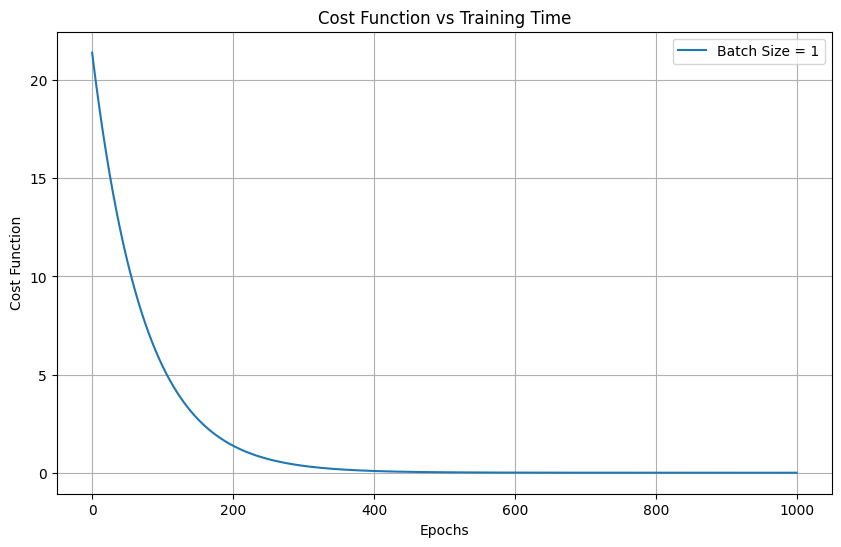

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(J_vec, label=f"Batch Size = {batch_size}")
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Training Time")
plt.legend()
plt.grid(True)
plt.show()


Now, we are going to plot the normalized Cost function vs Epochs for each batch size

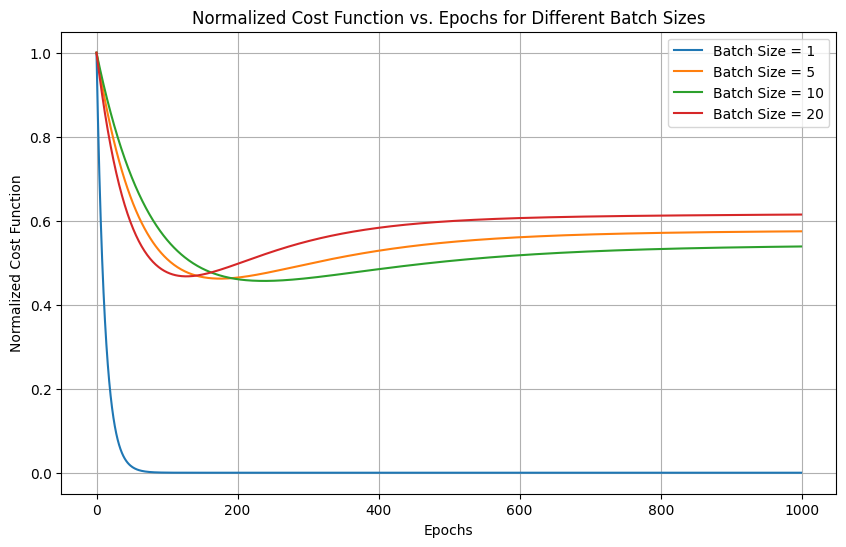

In [ ]:
m = [1, 5, 10, 20]  # batch sizes
epochs = 1000
step = 1e-4

plt.figure(figsize=(10, 6))

for batch_size in m:
    J_vec = np.zeros([epochs, 1])
    w_vec = [0, 0]
    w_array = np.zeros([epochs, len(w_vec)])

    m_indices = np.random.choice(X.shape[0], batch_size, replace=False)
    X_m = X[m_indices]
    y_m = y[m_indices]

    J_vec[0] = J(X_m, y_m, w_vec, batch_size)
    w_array[0, :] = w_vec

    for i in range(epochs - 1):
        y_pred = X_m.dot(w_array[i, :])
        gradient = -(1 / batch_size) * X_m.T.dot(y_m - y_pred)
        average_gradient = np.mean(gradient, axis=1)
        w_array[i + 1, :] = w_array[i, :] - step * average_gradient
        J_vec[i + 1] = J(X_m, y_m, w_array[i + 1, :], batch_size)

    # Normalize the cost function
    J_vec_normalized = J_vec / np.max(J_vec)

    plt.plot(J_vec_normalized, label=f"Batch Size = {batch_size}")

plt.xlabel("Epochs")
plt.ylabel("Normalized Cost Function")
plt.title("Normalized Cost Function vs. Epochs for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()


**Caution:** when this code is rerun, very different results may occur due to the random nature of the batches being chosen, which may not be uniformly distributed within the dataset. This would cause larger batch sizes to be more likely to have a higher steady state normalized error, as well as a much higher likelihood on average to increase from the minmimum error.

However, we see that the normalized cost functions for non-unity batch sizes, which trivially trends to zero, hover between 0.4 to 0.7, approaching 1.0 at time. This means too many epochs will cause overfitting/overtraining.

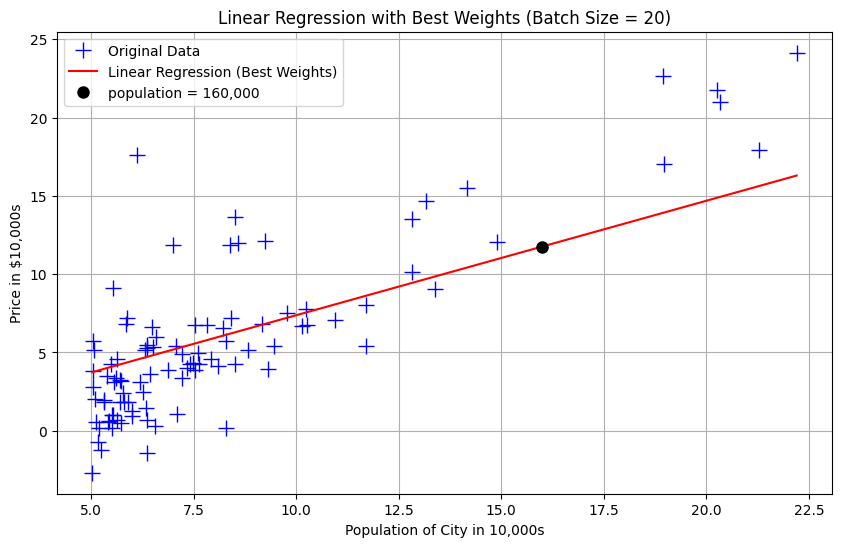

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 20
epochs = 1000
step = 1e-4

J_vec = np.zeros([epochs, 1])
w_vec = [0, 0]
w_array = np.zeros([epochs, len(w_vec)])

m_indices = np.random.choice(X.shape[0], m, replace=False)
X_m = X[m_indices]
y_m = y[m_indices]

J_vec[0] = J(X_m, y_m, w_vec, m)
w_array[0, :] = w_vec

for i in range(epochs - 1):
    y_pred = X_m.dot(w_array[i, :])
    gradient = -(1 / m) * X_m.T.dot(y_m - y_pred)
    average_gradient = np.mean(gradient, axis=1)
    w_array[i + 1, :] = w_array[i, :] - step * average_gradient
    J_vec[i + 1] = J(X_m, y_m, w_array[i + 1, :], m)

min_cost_index = np.argmin(J_vec)
best_weights = w_array[min_cost_index, :]

# Plot linear regression using the best weights
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y[:, 0], 'b+', markersize=12, label='Original Data')

x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_values = best_weights[0] + best_weights[1] * x_values
plt.plot(x_values, y_values, 'r-', label='Linear Regression (Best Weights)')

# Plot a black circle at x = 16 on the regression line
x_new = 16
y_new = best_weights[0] + best_weights[1] * x_new
plt.plot(x_new, y_new, 'ko', markersize=8, label='population = 160,000')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title('Linear Regression with Best Weights (Batch Size = 20)')
plt.legend()
plt.grid(True)
plt.show()


Above, we see how for a batch size of 20, despite the "higher" normalized cost function, our model still closely matches what we might expect the home price to be. This is a result of the higher batch size, which updates the weights in a "more representative" way, such that the line of best fit takes into account more points. Therefore, higher batch sizes give more useful models, at the expense of computing time.

## Question 3 uses a neural network to peform logistic regression to predict breast cancer when trained with the Wisconsin breast cancer training set

First, we import the raw data itself

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()

print(data['data'].shape)  # Feature data
print(data['target'].shape)  # Target values
print(data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


Now we will print the description to see the features

In [ ]:
print(data['DESCR'])  # Description of the dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Now, we will split our data and use standard scalar to normalize our data's values and standard deviation. This helps no feature from being unfairly weighted due to unnormalized values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #70-30 split with training and test data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

A logistic regression model with a first lasso is used to reduce the number of features we will consider from 30 to 7

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with L1 regularization (Lasso)
lasso_logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lasso_logreg.fit(X_train, y_train)

# Get feature importance (coefficients)
lasso_coeffs = lasso_logreg.coef_[0]
F7_initial_weights = lasso_coeffs[lasso_coeffs != 0]
print("New Weights Are:", F7_initial_weights)

# Print selected features
selected_features = np.array(data.feature_names)[lasso_coeffs != 0]
selected_feature_indices = np.where(lasso_coeffs != 0)[0]
print("Selected Features Indices",selected_feature_indices)
print("Selected Features:", selected_features)

#Now we shrink the features of the training data
X_train_F7 = X_train[:, selected_feature_indices]
print("New shape of our training data:",X_train_F7.shape)

New Weights Are: [-0.47778909 -0.03174371 -2.25158788 -0.48843077 -0.2476595  -0.93706978
 -0.17585256]
Selected Features Indices [ 7 10 20 21 24 27 28]
Selected Features: ['mean concave points' 'radius error' 'worst radius' 'worst texture'
 'worst smoothness' 'worst concave points' 'worst symmetry']
New shape of our training data: (398, 7)


Now, we will do the same but with our 7 feature training data. The c is the inverse of lambda, and c has been reduced iteratively to get new weights with only 2 that are non-zero. This helps us identify the most import features we want to classify breast cancer with.

In [ ]:
# Train logistic regression with L1 regularization (Lasso)
lasso_logreg = LogisticRegression(penalty='l1', C=0.015, solver='liblinear')
lasso_logreg.fit(X_train_F7, y_train)

F7_weights_new = lasso_logreg.coef_[0]
print("Old F7 weights:", F7_initial_weights)
print("New F7 weights:", F7_weights_new)

indices_in_F7 = np.where(F7_weights_new != 0)[0]
indices_final = selected_feature_indices[indices_in_F7]
print("Final Feature Indices:", indices_final)
print("Final Features used to Classify Breast Cancer:", data.feature_names[indices_final])

Old F7 weights: [-0.47778909 -0.03174371 -2.25158788 -0.48843077 -0.2476595  -0.93706978
 -0.17585256]
New F7 weights: [ 0.          0.         -0.51757682  0.          0.         -0.68329132
  0.        ]
Final Feature Indices: [20 27]
Final Features used to Classify Breast Cancer: ['worst radius' 'worst concave points']


Now, we will use our finalized data set, the training set with just the two "most important features" taken into account. This training set we be used to make out prediction we will then put into a heat map to help visualize the accuracy and precision

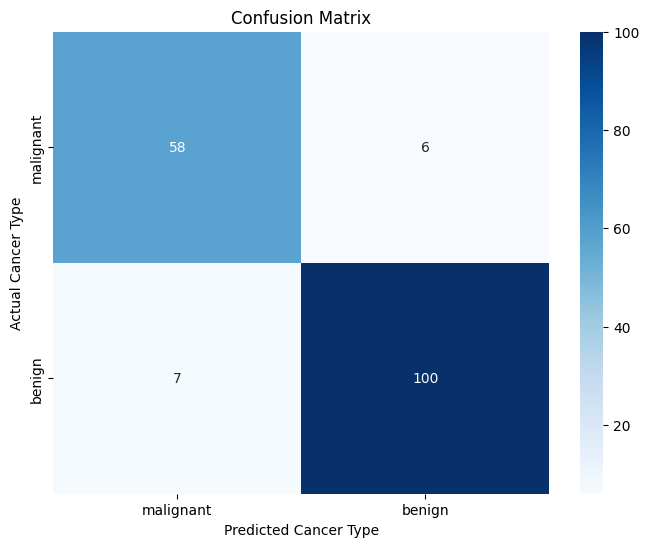

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.94      0.93      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
X_train_final = X_train[:, indices_final]

log_reg = LogisticRegression()
log_reg.fit(X_train_final, y_train)

y_pred = log_reg.predict(X_test[:, indices_final]) #Test just using indicies of needed features

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Cancer Type")
plt.ylabel("Actual Cancer Type")
plt.title("Confusion Matrix")
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Finally, we will label our heat map and interpret the data:

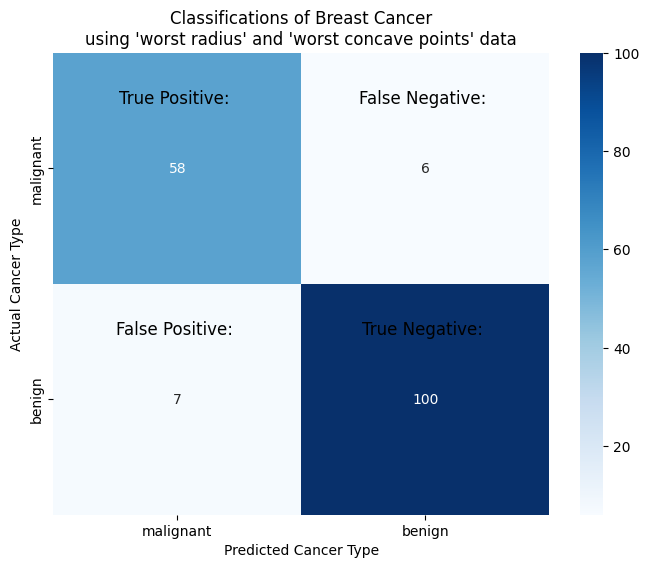

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.94      0.93      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)

# Add labels to the quadrants
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
for i, label in enumerate(labels):
    text = plt.text(i % 2 + 0.5, i // 2 + 0.2, f"{label}: ", ha='center', va='center', fontsize=12, color='black') # Moved text up

plt.xlabel("Predicted Cancer Type")
plt.ylabel("Actual Cancer Type")
plt.title("Classifications of Breast Cancer\nusing 'worst radius' and 'worst concave points' data", fontsize=12) # Two-line title
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


From the above data, we can see a similar number of false negatives and false positives. This measn the f1 score is higher for 1, or the benign case, as there are more benign data points. The f1 score for malignant tumors is only 0.90, which may be unacceptable considering the high cost of misdiagnosising the severity of a tumor. However, as this only takes into account 2 features of the tumor instead of the original 30, it may still serve as a useful "first check" before further tests are done. If so, the model should be tweaked to avoid false negatives, as future tests with all the features will reduce the false positives. If the preliminary test gives a false negative, we cannot compensate with future tests that will not be run.

## Question 4 solves the same problem as question 2, but uses a neural net with limited neurons

First, we import the necessary libraries and import the data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files

# Mount Google Drive using drive._mount() to potentially bypass the issue
# This method might provide a more direct way to handle authentication
drive.mount('/content/drive')

# Go to the current folder
%cd /content/drive/MyDrive/

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


Now, we will split our data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We can now train the data

In [ ]:
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(1,)))
model.add(Dense(1, activation='linear'))

from tensorflow.keras.optimizers import SGD

custom_opt = SGD(learning_rate=0.001)  # Adjusted learning rate

model.compile(optimizer=custom_opt,
              loss= 'mse',
              metrics=['mse', 'mae'])
model.summary()

history = model.fit(X_train, y_train, epochs=30, validation_split=0.3, batch_size=64)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_186 (Dense)                    │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 195.1332 - mae: 11.9606 - mse: 195.1332 - val_loss: 119.0705 - val_mae: 8.1384 - val_mse: 119.0705
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 86.1654 - mae: 7.4125 - mse: 86.1654 - val_loss: 69.2702 - val_mae: 5.8511 - val_mse: 69.2702
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 48.5580 - mae: 5.2697 - mse: 48.5580 - val_loss: 44.0221 - val_mae: 4.5564 - val_mse: 44.0221
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 30.1444 - mae: 4.0594 - mse: 30.1444 - val_loss: 30.1827 - val_mae: 3.7343 - val_mse: 30.1827
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 20.5196 - mae: 3.2767 - mse: 20.5196 - val_loss: 22.6059 - val_mae: 3.1854 - val_mse: 22.6059
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 15.5942 - mae: 2.8452 - mse: 15.5942 - val_loss: 18.5429 - val_mae: 3.0536 - val_mse: 18.5429
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 13.1950 - mae: 2.6565 - mse: 

Now, we can plot the training and validation losses over time

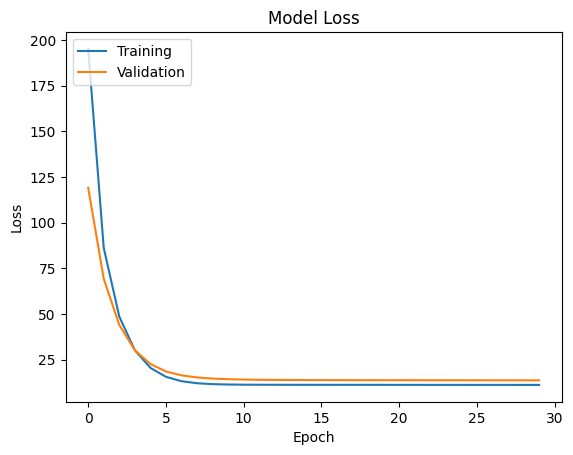

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


Above, we see that the training loss plateaus, as well as the validation loss. The training loss levels off around 12, while the validation loss is a bit higher.
**HOWEVER:** there is a large amount of variability in these results when rerun. More often than not, the loss has an asymptote around 12. But, there are occasions where the training loss levels off around 55, and the validation loss is much higher

This loss of 55 was steady even with much higher epochs, implying asymptotic behavior.

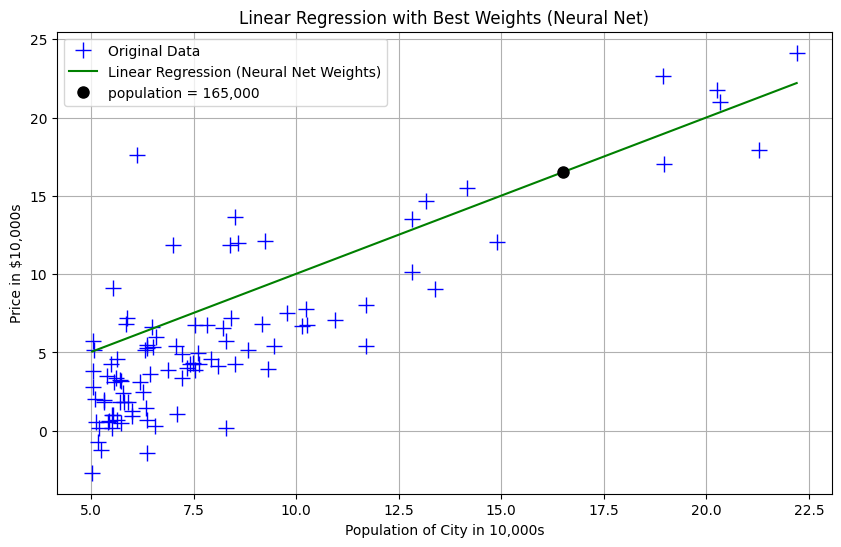

In [ ]:
# Get the weights from the trained neural network
weights = model.get_weights()

# Extract the weights and bias from the second layer
W2 = weights[2]
b2 = weights[3]

#Since there are only two features in the data, we can simply use the weights for the line of best fit
best_weights_nn = [b2[0], W2[0][0]]

# Plot linear regression using the best weights from the neural network
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b+', markersize=12, label='Original Data')

x_values = np.array([np.min(X), np.max(X)])
y_values = best_weights_nn[0] + best_weights_nn[1] * x_values
plt.plot(x_values, y_values, 'g-', label='Linear Regression (Neural Net Weights)')

# Plot a black circle at x = 16.5 on the regression line
x_new = 16.5
y_new = best_weights_nn[0] + best_weights_nn[1] * x_new
plt.plot(x_new, y_new, 'ko', markersize=8, label='population = 165,000')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title('Linear Regression with Best Weights (Neural Net)')
plt.legend()
plt.grid(True)
plt.show()

The above graph gives a similar line of best fit to problem 4